In [5]:
from fitparse import FitFile
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# .fit file parser

In [6]:
"""
Parses a .fit file and converts it into a CSV file.

This function reads activity data from a FIT (Flexible and Interoperable Data Transfer) file,
extracts relevant fields from 'record' messages, and stores the results in a pandas DataFrame.
The resulting DataFrame is then saved to a specified CSV file.

Args:
    input_path (str): Path to the input .fit file.
    output_path (str): Path to save the resulting .csv file.

Returns:
    pd.DataFrame: A DataFrame containing parsed data from the FIT file.
"""

"\nParses a .fit file and converts it into a CSV file.\n\nThis function reads activity data from a FIT (Flexible and Interoperable Data Transfer) file,\nextracts relevant fields from 'record' messages, and stores the results in a pandas DataFrame.\nThe resulting DataFrame is then saved to a specified CSV file.\n\nArgs:\n    input_path (str): Path to the input .fit file.\n    output_path (str): Path to save the resulting .csv file.\n\nReturns:\n    pd.DataFrame: A DataFrame containing parsed data from the FIT file.\n"

In [7]:

def parse_fit_to_csv(input_path, output_path):
    # Load the .fit file
    fitfile = FitFile(input_path)

    records = []
    for record in fitfile.get_messages('record'):
        record_data = {}
        for field in record:
            if field.name and field.value is not None:
                record_data[field.name] = field.value
        if record_data:
            records.append(record_data)

    # Convert to pandas DataFrame
    df = pd.DataFrame(records)

    # Save as CSV
    df.to_csv(output_path, index=False)
    print(f"✅ Data saved to: {output_path}")
    
    return df

# Example usage
if __name__ == "__main__":
    input_file = "train_data.fit"
    output_file = "train_data.csv"
    df = parse_fit_to_csv(input_file, output_file)

✅ Data saved to: train_data.csv


# Data analysis

In [8]:
df

,cadence,enhanced_speed,heart_rate,position_lat,position_long,speed,timestamp
0,41,0.00,72,579783839,529898131,0.00,2024-05-22 14:37:35
1,41,0.00,72,579783763,529898084,0.00,2024-05-22 14:37:36
2,41,0.00,72,579783874,529898378,0.00,2024-05-22 14:37:37
3,41,0.00,72,579783958,529898474,0.00,2024-05-22 14:37:38
4,41,0.41,71,579784037,529898462,0.41,2024-05-22 14:37:39
...,...,...,...,...,...,...,...
6419,41,0.78,154,579783029,529896871,0.78,2024-05-22 16:36:21
6420,41,0.00,153,579783021,529896879,0.00,2024-05-22 16:36:22
6421,41,0.00,152,579783013,529896895,0.00,2024-05-22 16:36:23
6422,41,0.00,152,579782998,529896911,0.00,2024-05-22 16:36:24


In [9]:
df.describe()

,cadence,enhanced_speed,heart_rate,position_lat,position_long,speed,timestamp
count,6424.0,6424.000000,6424.000000,6.424000e+03,6.424000e+03,6424.000000,6424
mean,41.0,3.635484,126.989882,5.793980e+08,5.303843e+08,3.635484,2024-05-22 15:36:34.575809536
min,41.0,0.000000,70.000000,5.790138e+08,5.298969e+08,0.000000,2024-05-22 14:37:35
25%,41.0,2.800000,106.000000,5.790986e+08,5.301270e+08,2.800000,2024-05-22 15:07:06.750000128
50%,41.0,3.870000,131.000000,5.794211e+08,5.303432e+08,3.870000,2024-05-22 15:34:04.500000
75%,41.0,4.650000,146.000000,5.796500e+08,5.306187e+08,4.650000,2024-05-22 16:06:53.249999872
max,41.0,10.100000,164.000000,5.798046e+08,5.309026e+08,10.100000,2024-05-22 16:36:25
std,0.0,1.554835,22.330491,2.782188e+05,2.984378e+05,1.554835,NaN


In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp']) 

start = df['timestamp'].min()
end = df['timestamp'].max()

duration = end - start
print(f"⏱ Train duration: {duration}")

⏱ Train duration: 0 days 01:58:50


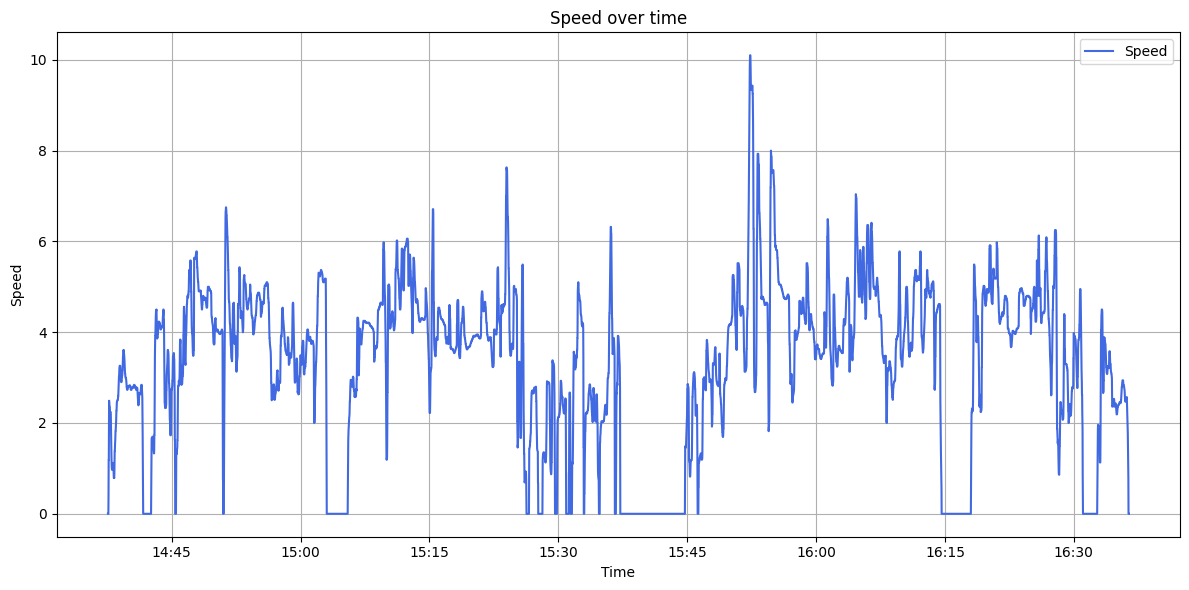

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['speed'], label='Speed', color='royalblue')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xlabel("Time")
plt.ylabel('Speed')
plt.title(f"Speed over time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


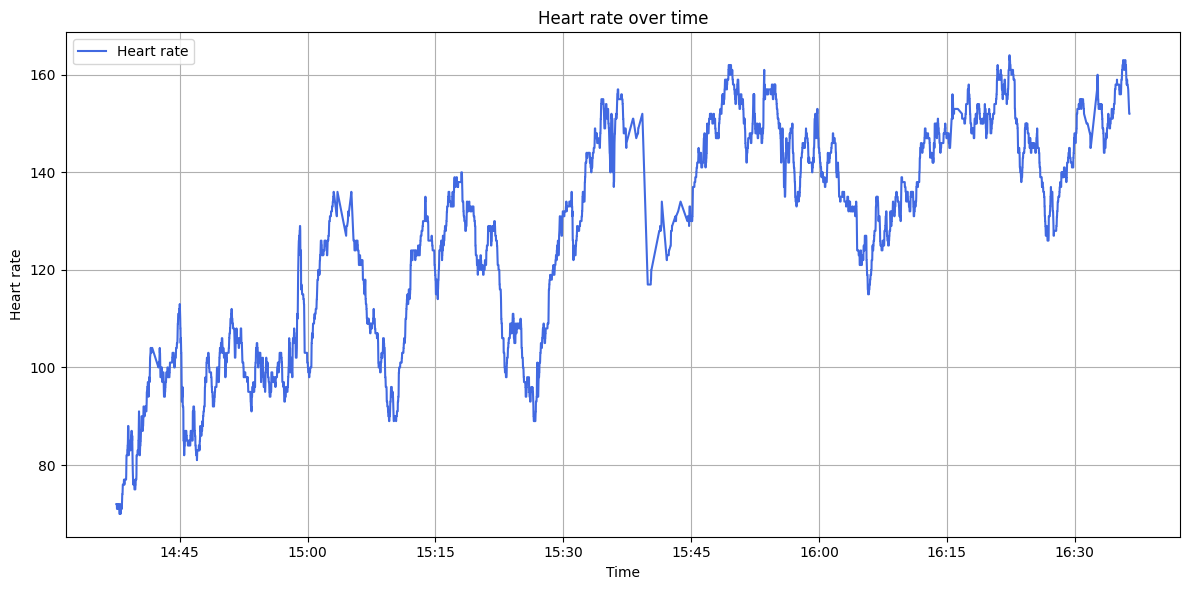

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['heart_rate'], label='Heart rate', color='royalblue')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xlabel("Time")
plt.ylabel('Heart rate')
plt.title(f"Heart rate over time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# calories burned script 

In [ ]:
 """
    Estimates total calories burned for men based on heart rate, weight, and age.

    This function calculates calories burned using the heart rate-based formula for men:
        kcal/min = (-55.0969 + 0.6309 × HR + 0.1988 × weight_kg + 0.2017 × age) / 4.184

    It first computes the duration between each heart rate measurement, then applies the formula 
    for each interval and sums the total.

    Args:
        df (pd.DataFrame): DataFrame containing 'timestamp' and 'heart_rate' columns.
        weight_kg (float): Weight of the individual in kilograms.
        age (int): Age of the individual in years.

    Returns:
        float: Total estimated calories burned.
    """

In [11]:
def calories_burned_by_heart_rate_men(df, weight_kg, age):
    # Create a copy to avoid modifying the original DataFrame
    df = df.copy()

    # Convert timestamp column to datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Sort data by time in case it's not already sorted
    df = df.sort_values('timestamp')

    # Calculate duration between consecutive heart rate samples (in seconds)
    df['duration_sec'] = df['timestamp'].diff().dt.total_seconds().fillna(0)

    # Apply the calorie burn formula for men:
    # kcal/min = (-55.0969 + 0.6309 × HR + 0.1988 × weight + 0.2017 × age) / 4.184
    # Then multiply by duration in minutes
    df['kcal'] = ((-55.0969 + 0.6309 * df['heart_rate'] +
                   0.1988 * weight_kg + 0.2017 * age) / 4.184) * (df['duration_sec'] / 60)

    # Return total calories burned
    return df['kcal'].sum()

In [33]:
kcal = calories_burned_by_heart_rate_men(df, weight_kg=100, age=28)
print(f"🔥 Burned: {kcal:.1f} Kcal")

🔥 Burned: 1450.1 Kcal


# Calculate distance from GPS coordinates script

Coordinates in .fit files are VERY OFTEN stored in a 7-digit format, for example:
position_lat = 514252000, but the actual value should be 51.4252.

This is because FIT files use the semicircle format for GPS coordinates.

The correct formula to convert is:

latitude = raw_lat × (180 / 2³¹)

In [ ]:
    """
    Calculates the total distance traveled based on GPS coordinates in a DataFrame.

    This function checks for missing coordinate data, converts GPS values from semicircles
    to degrees if needed, and calculates the total distance in kilometers using the Haversine formula.

    Args:
        df (pd.DataFrame): DataFrame containing GPS data.
        lat_col (str): Name of the column containing latitude values.
        lon_col (str): Name of the column containing longitude values.

    Returns:
        float: Total distance traveled in kilometers.
    """

In [34]:
def convert_semicircles_to_degrees(value):
    # Converts GPS coordinates from semicircles to degrees
    return value * (180 / 2**31)

def calculate_distance_km_from_df(df, lat_col='position_lat', lon_col='position_long'):
    # Check if the required latitude and longitude columns exist
    if lat_col not in df.columns or lon_col not in df.columns:
        raise ValueError(f"DataFrame must contain columns: '{lat_col}' and '{lon_col}'")

    # Drop rows with missing coordinate values and reset the index
    df = df.dropna(subset=[lat_col, lon_col]).reset_index(drop=True)

    # Check if coordinates are in semicircle format and need conversion
    if df[lat_col].abs().max() > 90 or df[lon_col].abs().max() > 180:
        print("ℹ️ Coordinates appear to be in semicircle format — converting to degrees.")
        df[lat_col] = df[lat_col].apply(convert_semicircles_to_degrees)
        df[lon_col] = df[lon_col].apply(convert_semicircles_to_degrees)

    total_distance = 0.0

    # Iterate over rows to compute cumulative distance between consecutive GPS points
    for i in range(1, len(df)):
        lat1, lon1 = df.loc[i - 1, lat_col], df.loc[i - 1, lon_col]
        lat2, lon2 = df.loc[i, lat_col], df.loc[i, lon_col]
        total_distance += haversine(lat1, lon1, lat2, lon2)

    # Print total distance in kilometers
    print(f"📏 Total distance traveled: {total_distance:.2f} km")
    return total_distance

In [35]:
calculate_distance_km_from_df(df)

ℹ️ Coordinates appear to be in semicircle format — converting to degrees.
📏 Total distance traveled: 23.57 km


23.570358708985285